In [20]:
import time
import cv2
import numpy as np
import os
from os import getcwd
from matplotlib import pyplot as plt

In [2]:
image_name = ["gun_per.jpg","gun_test.jpg","gun_test3.jpg"]

In [3]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    print(net.getUnconnectedOutLayers())
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

In [33]:
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id]) + f' {int((confidence)*100)}%'
    color = COLORS[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [5]:
image = cv2.imread(image_name[2])

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

In [6]:
with open("yolo.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]
    
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

In [7]:
net = cv2.dnn.readNet("yolov3_4000.weights", "cfg/yolov3.cfg")
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))

[200 227 254]


In [8]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [9]:
def get_digit(num):
    while (num > 9):
        num = num/10
    return num

In [10]:
for out in outs:
    #print(out)
    for detection in out:
        scores = detection[4:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    a = i
    i = get_digit(i)
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

cv2.imshow("object detection", image)

cv2.waitKey()

cv2.imwrite("object-detection.jpg", image)
cv2.destroyAllWindows()

### Function is used to detect multiple images in a loop

In [27]:
def set_up_pred(base_path,image_name, fig, fig_num):
    
    global rows, cols
    
    flag = False
    
    image = cv2.imread(os.path.join(base_path,image_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Width = image.shape[1]
    Height = image.shape[0]
    scale = 0.00392
    
    COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
    net = cv2.dnn.readNet("yolov3_4000.weights", "cfg/yolov3.cfg")
    blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(get_output_layers(net))
    
    clone = image.copy()
    
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4
    
    for out in outs:
        for detection in out:
            scores = detection[4:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    for i in indices:
        a = i
        i = get_digit(i)
        box = boxes[i]
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))
        flag = True
        
    fig.add_subplot(rows,cols, fig_num)
    plt.imshow(image)
    plt.axis('off')
    fig.add_subplot(rows,cols, fig_num + 1)
    plt.imshow(clone)
    plt.axis('off')
    #cv2.imshow("object detection", image)

    #cv2.waitKey()

    #cv2.imwrite("object-detection.jpg", image)
    #cv2.destroyAllWindows()
        
    return flag, fig

[200 227 254]
[200 227 254]
[200 227 254]


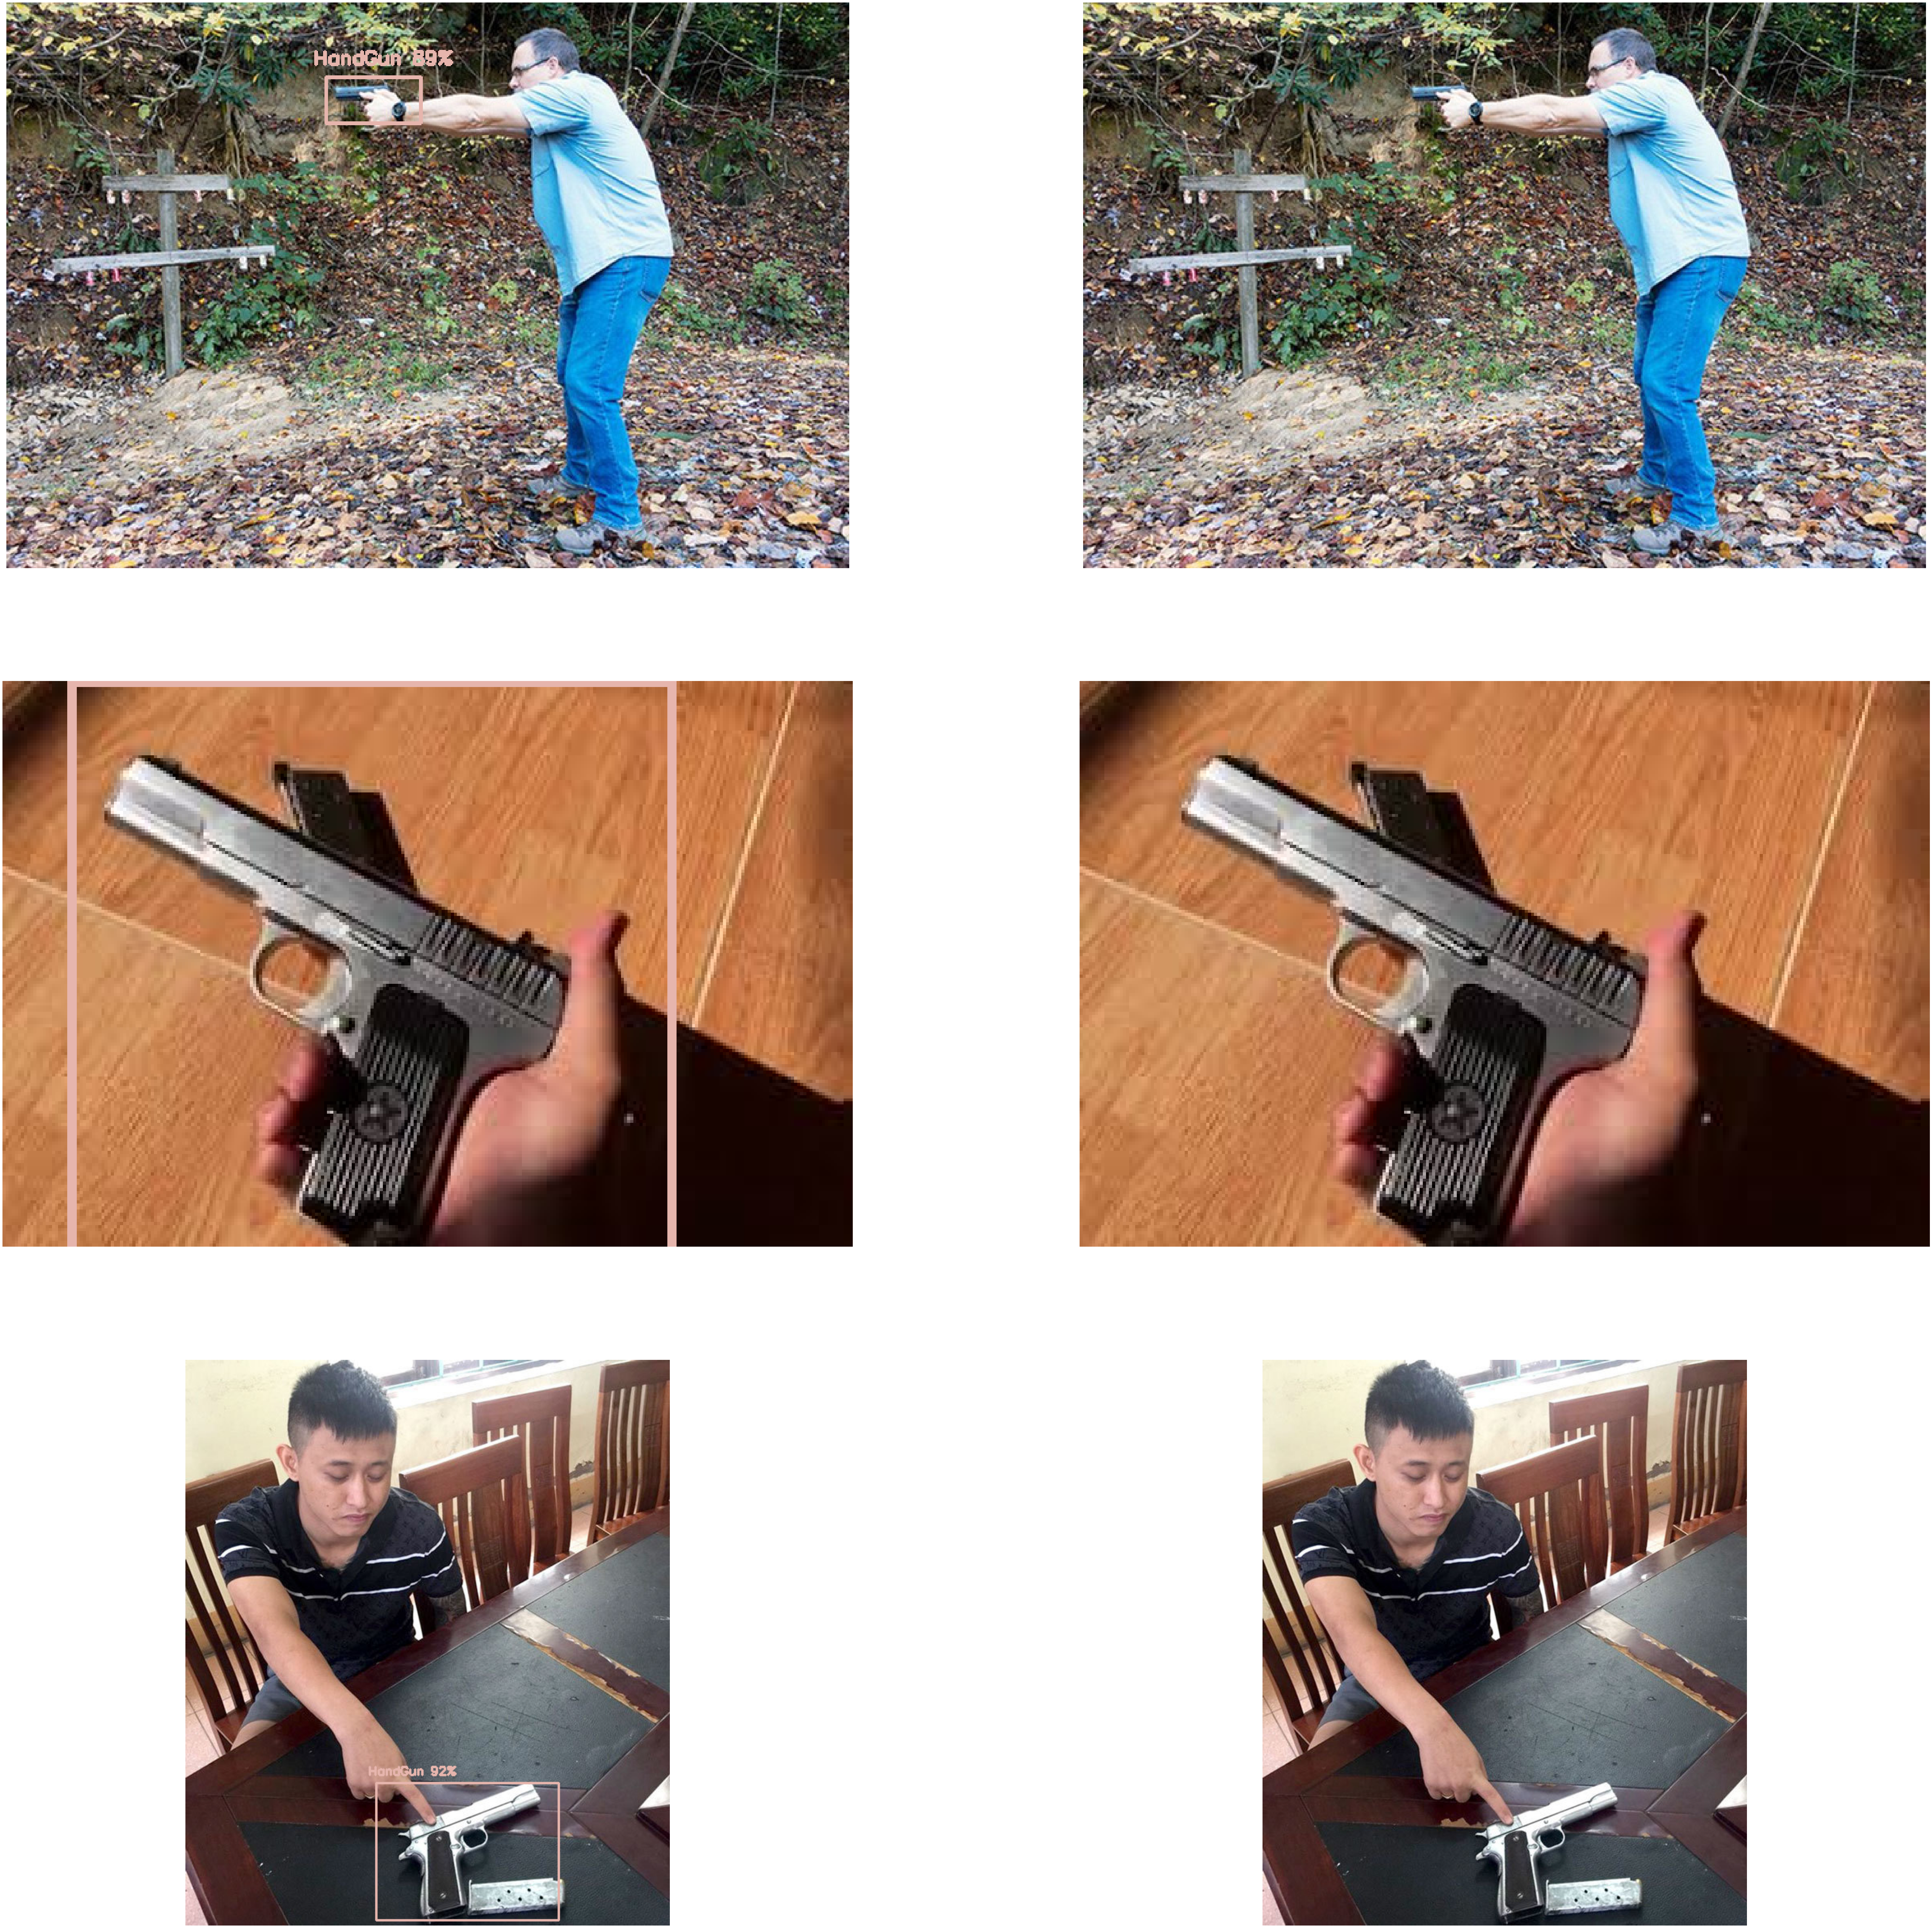

In [34]:
test = getcwd()
test = os.path.join(test,"test")

fig = plt.figure(figsize=(100,100))
fig_num = 1
rows = 3
cols = 2

total = 0
detections = 0

#for i in os.listdir(test):
for i in image_name:
    flag, fig = set_up_pred(test,i,fig, fig_num)
    fig_num +=2
    #total += 1
    #if flag:
        #detections +=1
    
    


In [13]:
print("accuracy =", detections/total)

accuracy = 0.24851367419738407
